## Guitar modulation
### Week 3 Lecture 2

Complex exponentials are very powerful signals! Other than representing a large class of signals, they are also useful in modulating signals. We will modulate a guitar signal and observe how multiplying an audio signal by complex exponentials causes shifts in frequency and phase.

### Demonstrate shift in frequency using multiplication of complex exponentials

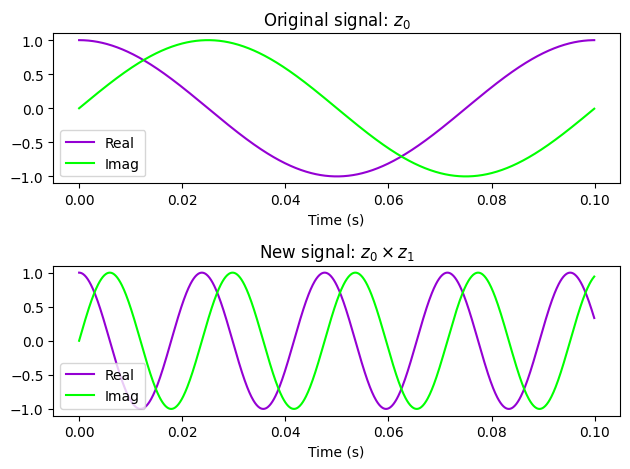

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Time vector: 0 to 1 seconds, 1000 Hz sample rate
t = np.arange(1000) / 10000.0

# Frequencies: 10.0 Hz and 32.0 Hz
om0 = 2.0 * np.pi * 10.0
om1 = 2.0 * np.pi * 32.0

# Create complex sinusoidal signal
z0 = np.exp(1j * om0 * t)
z1 = np.exp(1j * om1 * t)
# Shift z in frequency by multiplying with another complex sinusoidal signal
# Result has frequency 42.0 Hz = 10.0 Hz + 32.0 Hz
z_shifted = z0 * z1

plt.subplot(2, 1, 1)
plt.plot(t, z0.real, label="Real", color="darkviolet")
plt.plot(t, z0.imag, label="Imag", color="lime")
plt.title("Original signal: $z_0$")
plt.xlabel("Time (s)")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, z_shifted.real, label="Real", color="darkviolet")
plt.plot(t, z_shifted.imag, label="Imag", color="lime")
plt.title("New signal: $z_0 \\times z_1$")
plt.xlabel("Time (s)")
plt.legend()

plt.tight_layout()
plt.show()

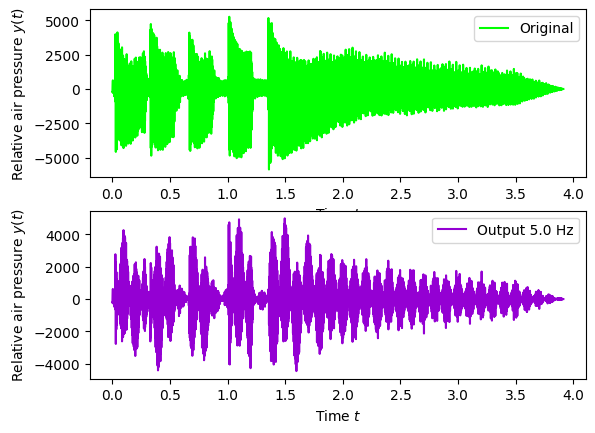

In [14]:


import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as sio

wav = sio.read("guitar_clean.wav")
sample_rate = wav[0]  # Sample rate
x = wav[1][:, 0]      # Read only one stereo channel

# Create time vector (independent variable)
time_vec = np.arange(len(x)) / float(sample_rate)

# Multiply the signal with a cosine wave of frequency f = 5.0 Hz
modulator_frequency = 5.0
out = x * np.exp(1j * 2.0 * np.pi * time_vec * modulator_frequency).real

# write the output to a wav file
sio.write("guitar_modulated.wav", sample_rate, out.astype(np.int16))
# Plot original and modified signals
fig, ax = plt.subplots(2, 1)
ax[0].plot(time_vec, x, label="Original", color="lime")
ax[0].legend()
ax[0].set_xlabel("Time $t$")
ax[0].set_ylabel("Relative air pressure $y(t)$")

# Plot the modulated signal in the second subplot
ax[1].plot(time_vec, out, label="Output 5.0 Hz", color="darkviolet")
ax[1].legend()
ax[1].set_xlabel("Time $t$")
ax[1].set_ylabel("Relative air pressure $y(t)$")

plt.show()